# Diabetes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import warnings
import os
import plotly as py
import plotly.graph_objs as go

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetic = pd.read_csv('diabetic_data.novocsv.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

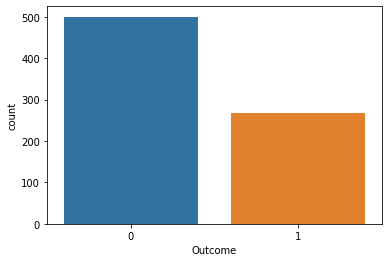

In [7]:
sns.countplot(x='Outcome',data=diabetes)
plt.show()

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


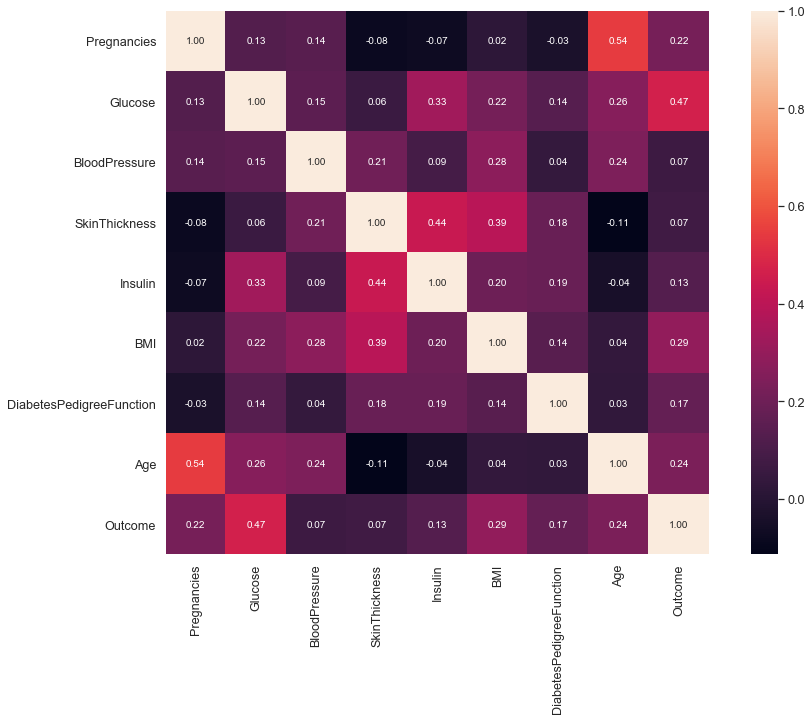

In [9]:
# Plotando um mapa de calor das correlações com todas as variáveis

corrmat = diabetes.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, # formatando a barra lateral de cores para o heatmap
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

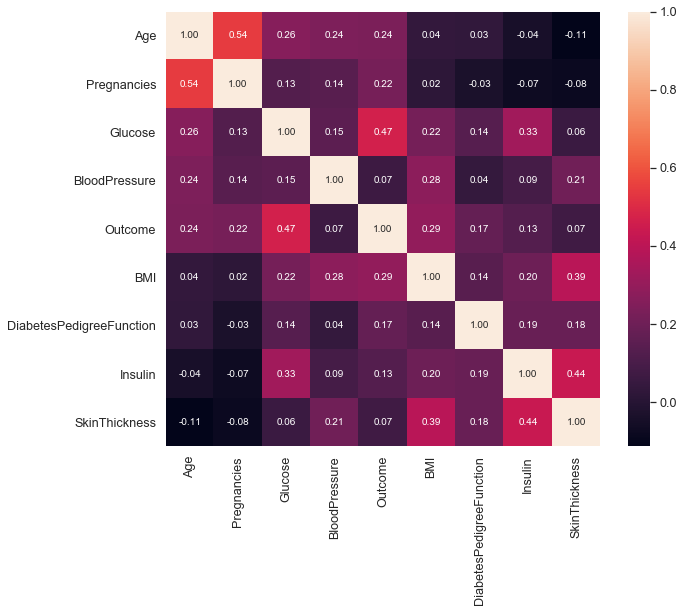

In [10]:
# Identificando as 10 variáveis que mais estão mais correlacionadas com o Age
# Plotando um mapa de calor com as 10 variáveis mais correlacionadas

corrmat = diabetes.corr()
cols = corrmat.nlargest(11, 'Age')['Age'].index
cm = np.corrcoef(diabetes[cols].values.T)
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

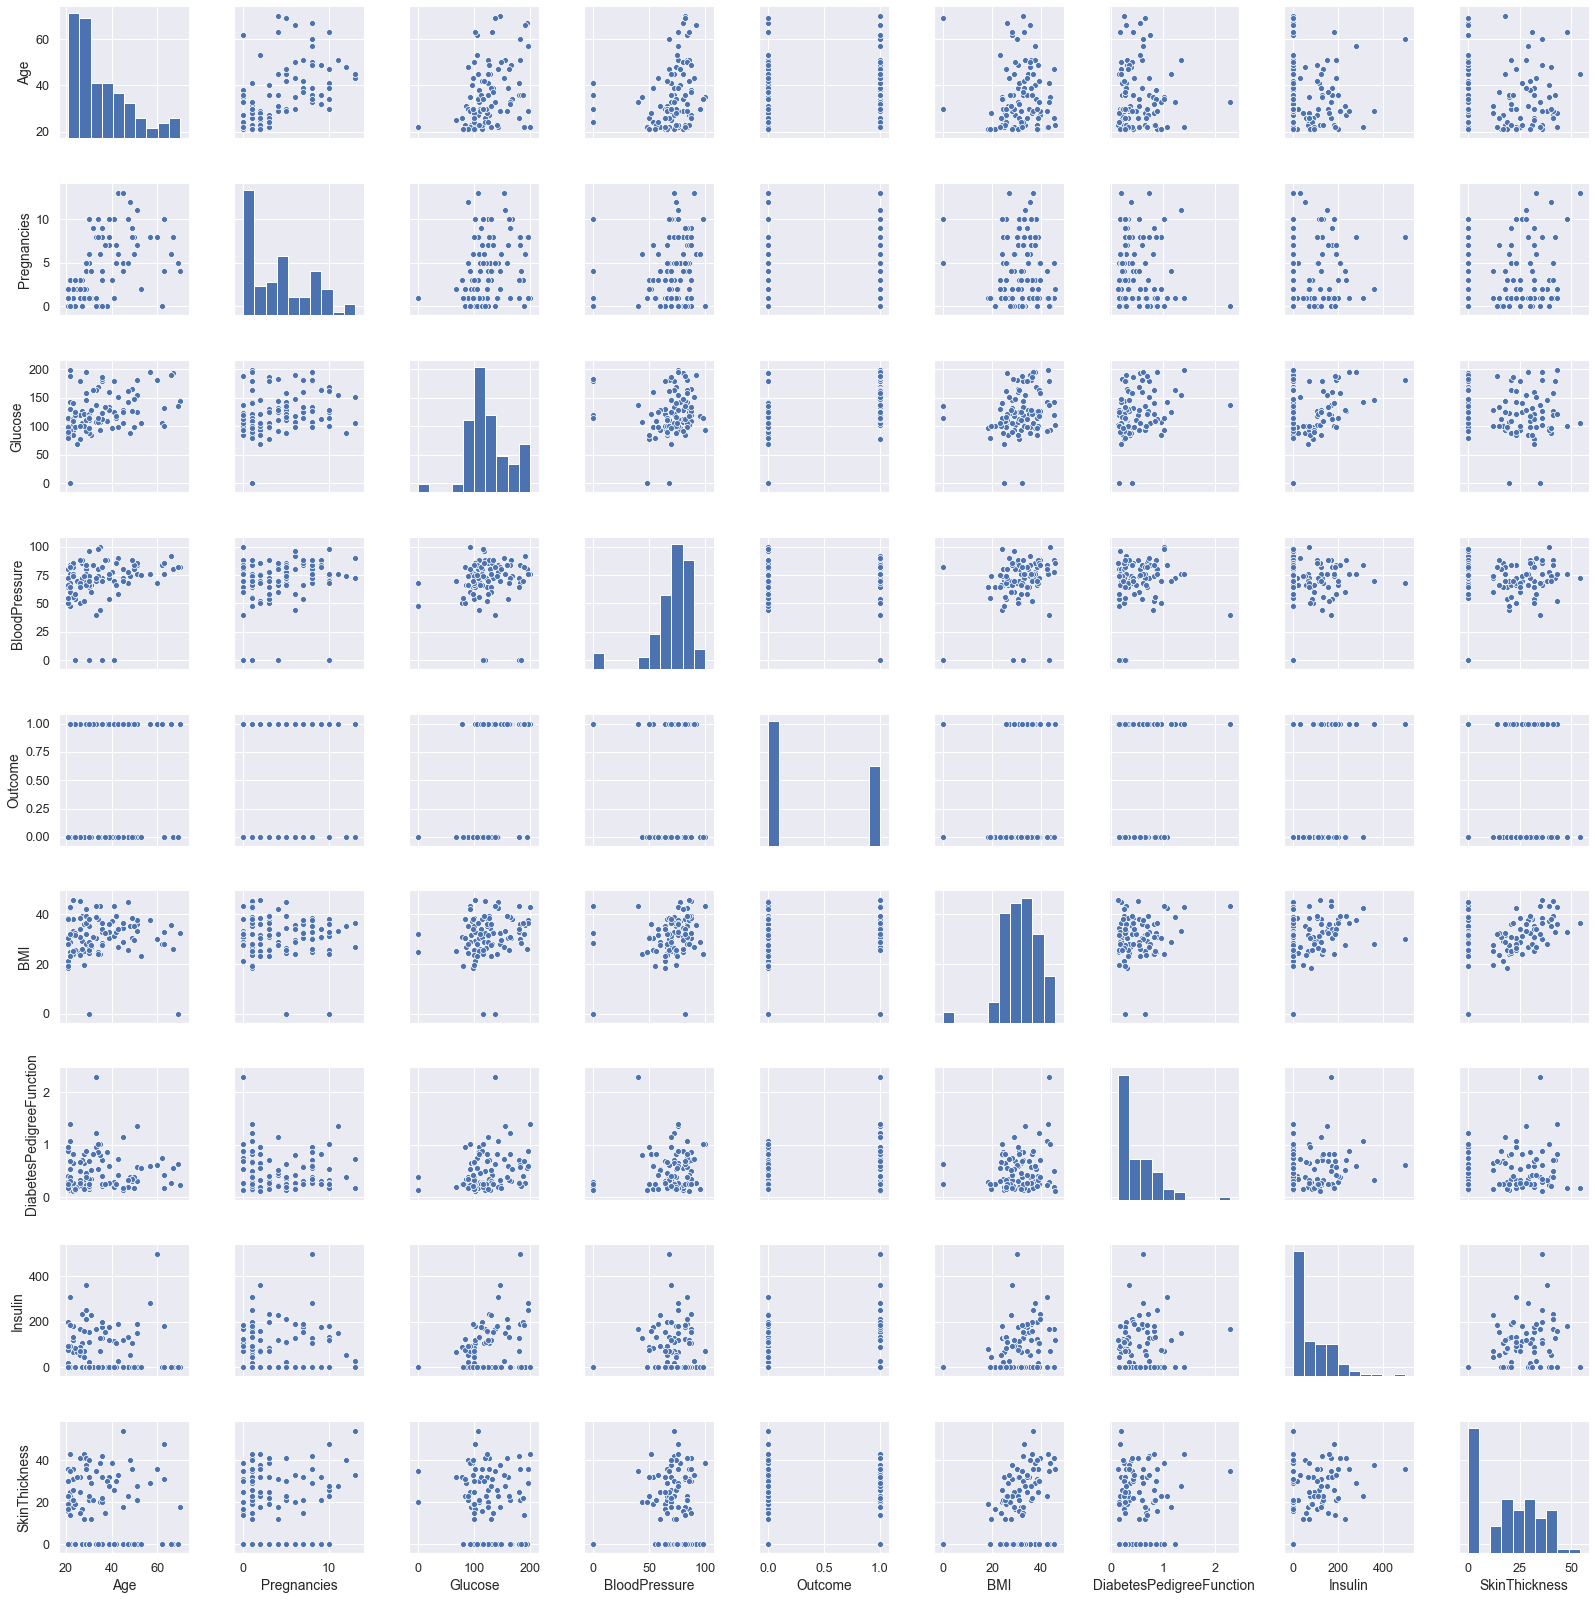

In [11]:
# Plotando o PAIRPLOT para as variáveis mais correlacionadas com um sample (100 amostras)
sample = diabetes[cols].sample(100)
sns.pairplot(sample)



In [12]:
import itertools

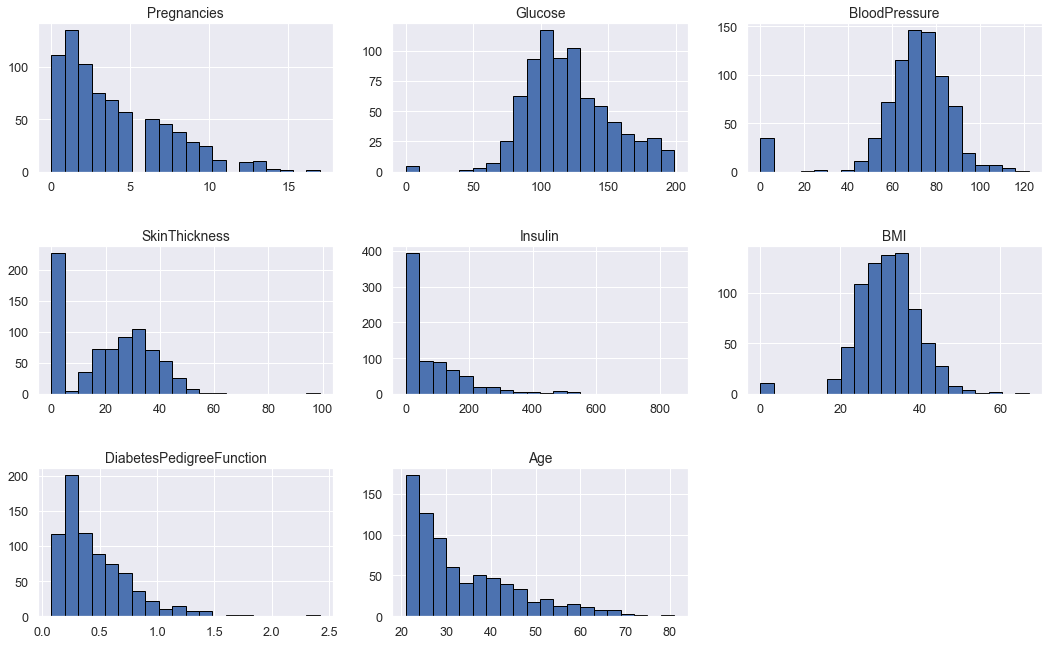

In [13]:
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

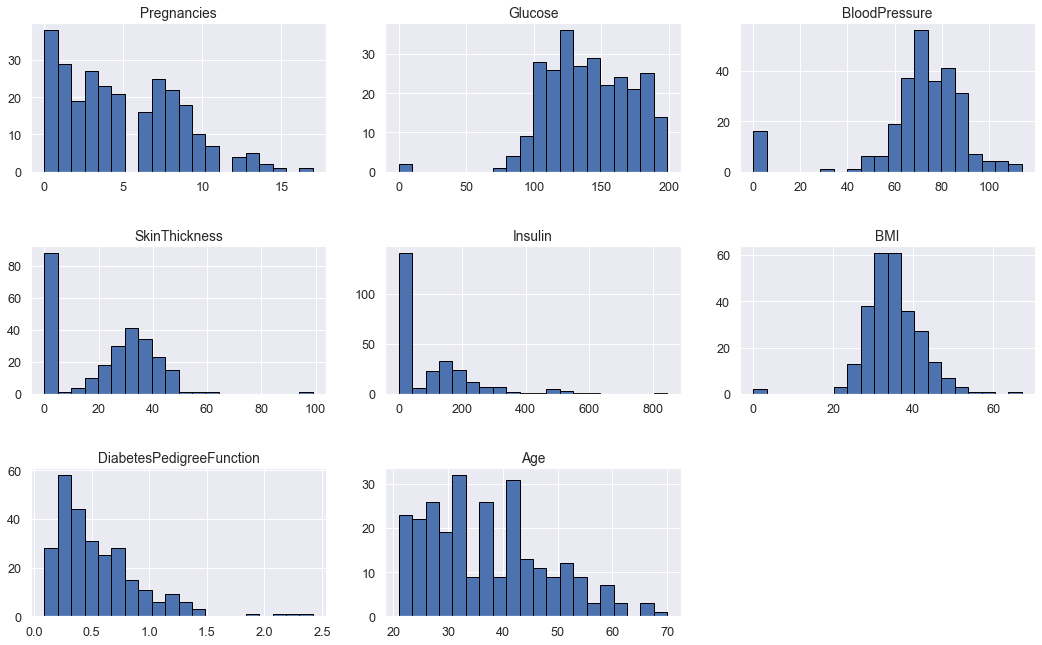

In [14]:
#análise dos casos de diabetes 

diab1=diabetes[diabetes['Outcome']==1]
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

/Users/mariaeduardarodriguesgoncalves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/mariaeduardarodriguesgoncalves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



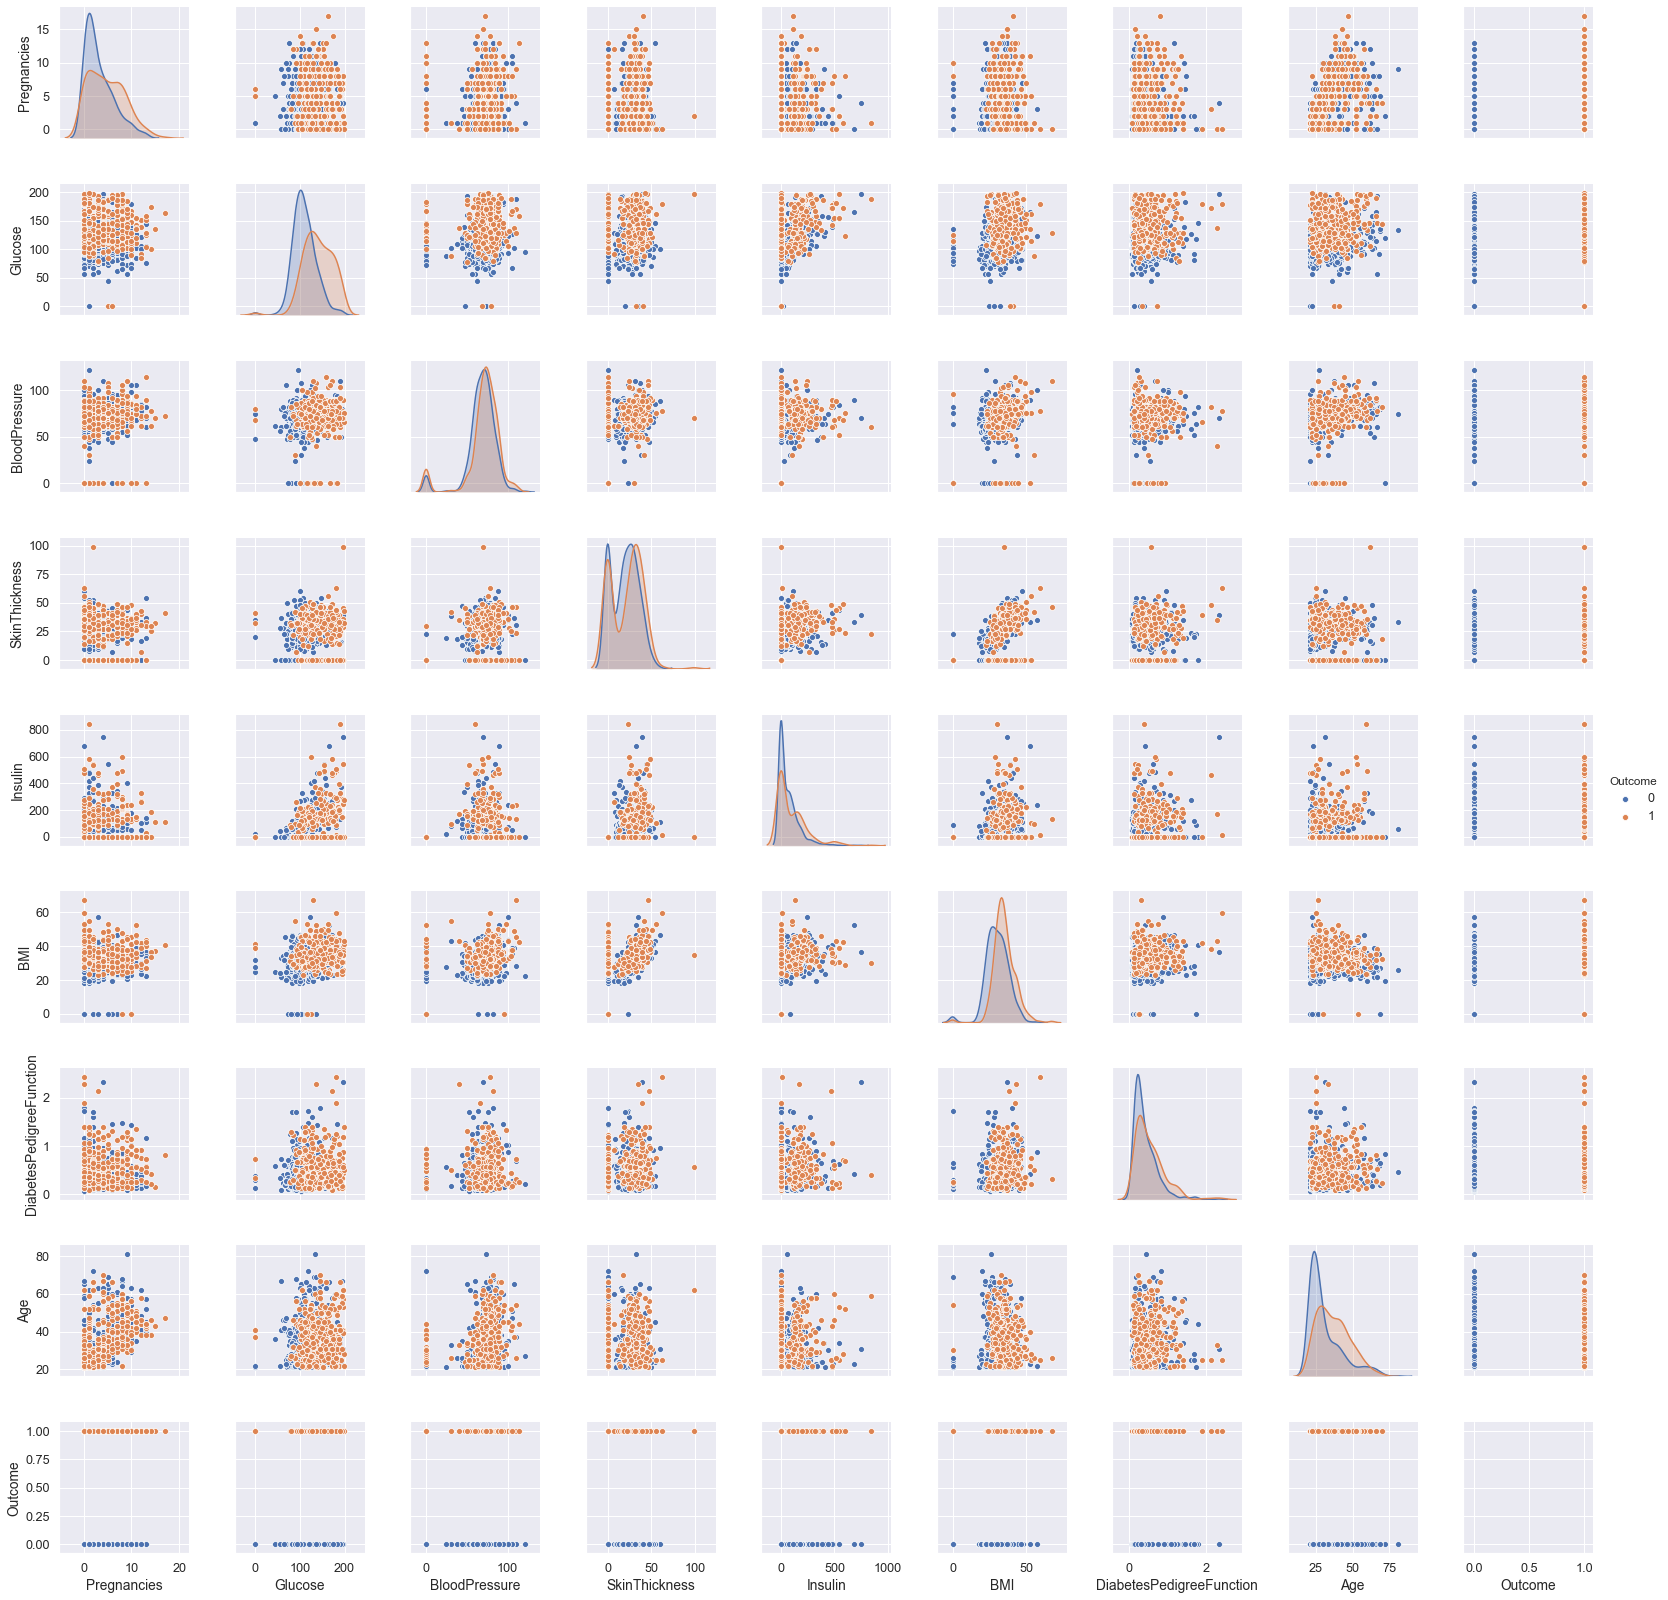

In [15]:
#Permite ver a distribuição dos recursos no conjunto de dados
sns.pairplot(data=diabetes,hue='Outcome',diag_kind='kde')
plt.show()

1) A diagonal mostra a distribuição do conjunto de dados com os gráficos de densidade do kernel.

2) Os gráficos de dispersão mostram a relação entre todos os atributos ou características tomadas em pares. Observando os gráficos de dispersão, podemos dizer que não há dois atributos capazes de separar claramente as duas instâncias da classe de resultado.

In [16]:
# Listando todas as colunas com os dados
list(diabetes.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [17]:
diabetes.groupby('Age')['Pregnancies'].mean().sort_values(ascending=False)

Age
81    9.000000
48    8.800000
57    8.800000
51    8.625000
47    8.333333
56    8.000000
68    8.000000
64    8.000000
43    7.769231
49    7.600000
39    7.416667
45    7.333333
44    7.250000
58    7.142857
54    7.000000
42    6.888889
38    6.875000
50    6.750000
41    6.500000
46    6.384615
40    6.230769
60    6.000000
34    5.857143
55    5.500000
61    5.500000
63    5.500000
53    5.400000
37    5.263158
36    5.187500
35    5.000000
66    5.000000
69    5.000000
52    4.625000
32    4.437500
33    4.058824
67    4.000000
70    4.000000
31    3.875000
62    3.750000
30    3.619048
65    3.333333
29    3.310345
28    3.028571
27    2.562500
59    2.333333
72    2.000000
26    1.969697
24    1.891304
25    1.770833
23    1.578947
22    1.555556
21    1.079365
Name: Pregnancies, dtype: float64

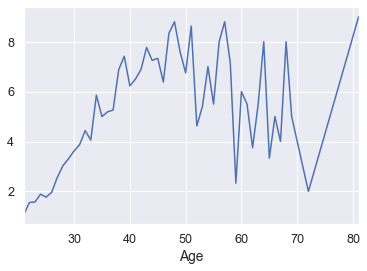

In [18]:
# Agrupando as pessoas da mesma idade e plotando a evolução da média do Age
# conforme a curva perde a linearidade, significa que o número de observações cai

diabetes.groupby('Age')['Pregnancies'].mean().plot()



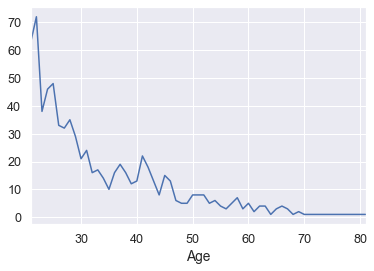

In [19]:
# Agrupando as pessoas da mesma idade pela quantidade de observações na variável Age

diabetes.groupby('Age')['Pregnancies'].size().plot()

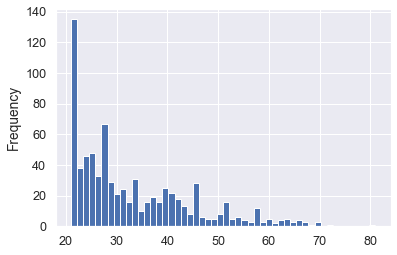

In [20]:
temp = diabetes[diabetes.Age<768].sample(768)
temp[temp.Age<768].Age.plot.hist(bins=50)

In [21]:
import statsmodels.formula.api as smf

In [22]:
# (1)Instanciando o modelo e (2)fazendo o melhor ajuste matemático

first_function = 'Age ~ Pregnancies'
model = smf.ols(formula=first_function, data=diabetes).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     322.5
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.86e-60
Time:                        15:49:14   Log-Likelihood:                -2847.2
No. Observations:                 768   AIC:                             5698.
Df Residuals:                     766   BIC:                             5708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.9360      0.541     47.970      

# Criando uma modelagem preditiva 

In [23]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Estratificação:

Quando dividimos o conjunto de dados em conjuntos de dados de treinamento e teste, a divisão é completamente aleatória. Portanto, as instâncias de cada rótulo de classe ou resultado nos conjuntos de dados de treino ou teste são aleatórias. Portanto, podemos ter muitas instâncias da classe 1 nos dados de treinamento e menos instâncias da classe 2 nos dados de treinamento. Portanto, durante a classificação, podemos ter previsões precisas para a classe1, mas não para a classe2. Assim, estratificamos os dados, para que tenhamos dados proporcionais para todas as classes nos dados de treinamento e teste.

In [24]:

outcome=diabetes['Outcome']
data=diabetes[diabetes.columns[:8]]
train,test=train_test_split(diabetes,test_size=0.25,random_state=0,stratify=diabetes['Outcome'])#estratificar o resultado
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [25]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [26]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

In [27]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625
Accuracy for SVM kernel= linear is 0.7708333333333334


In [28]:
#regressão logistica 

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


In [29]:
#arvore de decisão

model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.7760416666666666


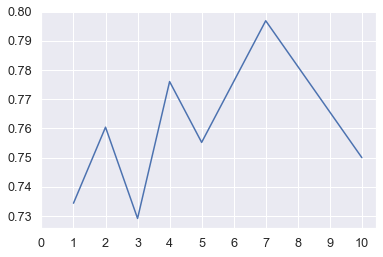

Accuracies for different values of n are: [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75      ]


In [30]:
#K-vizinhos mais próximos

a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [31]:
#juntando todas as solicitações 

abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.755208


Os algoritmos acima não estão fornecendo alta precisão. Isso pode ser aprimorado usando a Seleção de recursos e usando apenas os recursos relevantes. Também podemos usar a montagem ou a média de diferentes algoritmos. Farei essas coisas em partes subsequentes.

Extração / seleção de recursos:

1) Muitos recursos podem afetar a precisão do algoritmo.

2) Extração de Recurso significa selecionar apenas os recursos importantes para melhorar a precisão do algoritmo.

3) Reduz o tempo de treinamento e reduz o ajuste excessivo

4) Podemos escolher recursos importantes de 2 maneiras:

a) Matriz de correlação -> selecionando apenas os recursos não correlacionados.

b) RandomForestClassifier -> Dá a importância dos recursos

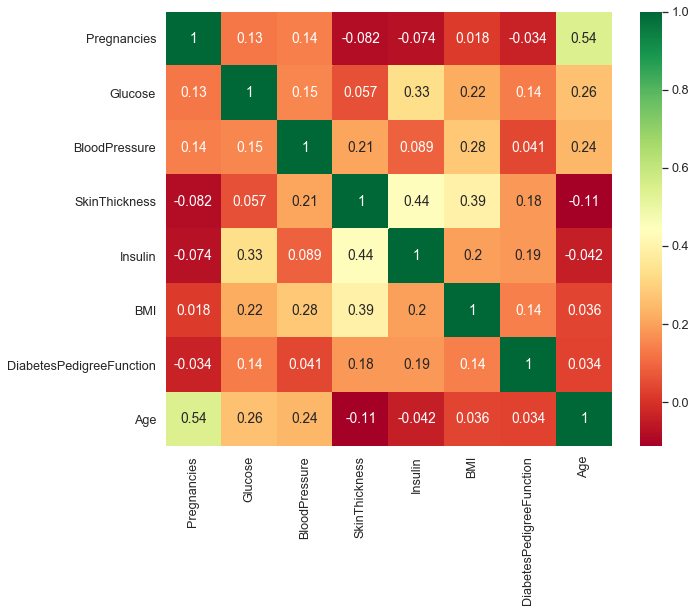

In [32]:
sns.heatmap(diabetes[diabetes.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Observações:

- Todos os recursos parecem não correlacionados. Portanto, não podemos eliminar nenhum recurso apenas olhando para a matriz de correlação.

Classificador Aleatório de Floresta

In [33]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diabetes[diabetes.columns[:8]]
Y=diabetes['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

Observações:

- As características importantes são: Glicose, IMC, Idade, DiabetesPedigreeFunction

Estandardização
Pode haver muitos desvios no conjunto de dados fornecido. Um exemplo no conjunto de dados pode ser o IMC, onde possui 248 valores exclusivos. Essa alta variação deve ser padronizada. A padronização é uma técnica útil para transformar atributos com uma distribuição gaussiana e diferentes médias e desvios padrão em uma distribuição gaussiana padrão com uma média de 0 e um desvio padrão de 1.

Usando apenas recursos e padronização importantes

